# ML Project on Multiple Linear Regression

### <span style="color:red"> Perfomed By: Oluwatimileyin Victor Adedigba </span>   

### <span style="color:red"> ABSTRACT </span>

The goal of this project is to explore and compare various machine learning methods for multiple linear regression and polynomial regression. I used a Python dataset that contains the product sales and the advertising budget allocated to TV, radio, and newspaper. I built and plotted a multiple linear regression model with all three predictors. Next, I implemented a polynomial regression model with degree 15 to account for the non-linear relationship between the predictors and the target variable. I measured and contrasted the performance of the models using metrics such as MSE, RMSE, MAE, and R-squared. I also applied ridge regression to regularize the models and used grid search to optimize the hyperparameters. The findings indicate that the ridge regression model with alpha parameter 8 has the highest performance among the models, with an R-squared value of 0.9 and an MSE of 3. The project showcases the use of different modules, classes, functions, and plots in Python for multiple linear regression and polynomial regression analysis.

In [9]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from typing import Optional
import math
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

## Importing the data set

This data set is composed of records of money (in k€) invested in TV, radio and newspaper ads for specific products and the corresponding sales (in m$).

In [10]:
data = pd.read_csv("Advertising.csv", index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Part 1: Creation and Visualization of a Multiple Linear Regression Model

### Data preparation
I have chosen to isolate my X and the y variables as:  
- 'sales' is my target variable.  
- For now I will use 'TV' and 'radio' as features  

I am not yet doing a train-test split for now as the aim of this section of the project is to view the visualize the model in 3D.

In [11]:
X = data[['TV', 'radio']].values
y = data['sales'].values.reshape(-1,1)

### Multiple Linear Regression Class
I am creating a Linear regression class called  MyLinearRegression to implement multiple linear regression.

In [12]:
class MyLinearRegression:
    def __init__(self):
        self.beta: Optional[np.ndarray] = None

    def set_beta(self, beta: np.ndarray):
        self.beta = beta

    def predict(self, X: np.ndarray) -> np.ndarray:
        first_column = np.ones((X.shape[0], 1))
        X_prime = np.hstack([first_column, X])
        return X_prime @ self.beta


### Visualizing the multiple regression

#### To commence, I am choosing beta values at random and visualizing my model in 3d
- Beta_0
- Beta_1 for TV advertisement
- Beta_2 for Radio advertisement

#### After, I'll try to adjust my parameters to get the best fit possible.

In [13]:
beta = np.array([
    ## My random  values here:
   2.92, 0.04, 0.19                 # These values of beta were gotten after several iterations
])

my_linear_regression = MyLinearRegression()
my_linear_regression.set_beta(beta)
assert len(beta) == 3  #Making sure I have 3 parameters

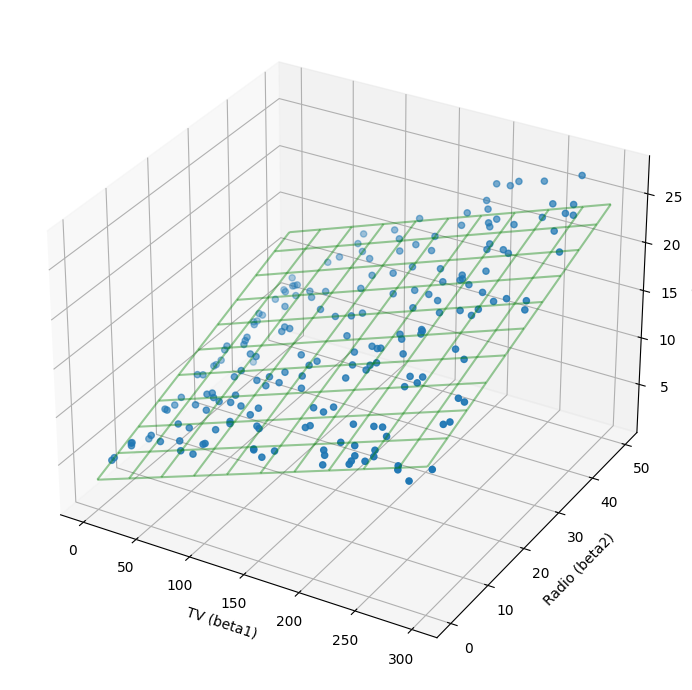

In [14]:
# I am creating this function to visualize my regression in 3d

def visualize_3d(regression_model):
    def create_mesh(beta):
        x_values = np.linspace(0, 300, 50).reshape(-1,1)
        y_values = np.linspace(0, 50, 50).reshape(-1,1)
        x_mesh, y_mesh = np.meshgrid(x_values, y_values)
        z_mesh = beta[0] + beta[1] * x_mesh + beta[2] * y_mesh
        return x_mesh, y_mesh, z_mesh

    if isinstance(regression_model, LinearRegression):
        beta = np.hstack([regression_model.intercept_, regression_model.coef_.squeeze()])
    else:
        beta = regression_model.beta

    x_mesh, y_mesh, z_mesh = create_mesh(beta)

    fig = plt.figure(figsize=(10,7))
    ax = plt.axes(projection="3d")

    ax.scatter3D(data['TV'], data['radio'], data['sales'].squeeze())
    ax.plot_wireframe(x_mesh, y_mesh, z_mesh, rstride=5, cstride=5, alpha=0.4, color='g')

    ax.set_xlabel('TV (beta1)')
    ax.set_ylabel('Radio (beta2)')
    ax.set_zlabel('Sales')
    plt.tight_layout()
    plt.show()

visualize_3d(my_linear_regression)

# Part 2: Deploying a polynomial regression
Here I will focus on one feature(for initial simplicity), 'TV', but I will create polynomial features from it.

### Data Preparation

In [15]:
X_poly = data[['TV']]
y_poly = data['sales']
X_train_poly, X_val_poly, y_train_poly, y_val_poly = train_test_split(X_poly, y_poly, test_size = 0.25, random_state = 0)

### I am creating a pipeline to combine the following elements:
- PolynomialFeatures of degree 8
- A StandardScaler
- A LinearRegression model (Sklearn)

In [16]:
polynomial_regression_pipeline = Pipeline([
  ('poly', PolynomialFeatures(degree = 8)),
  ('scaler', StandardScaler()),
  ('regression', LinearRegression())
])

### Here, I am fitting the pipeline on the poly training set and retrieving the coefficients of the LinearRegression


In [17]:
polynomial_regression_pipeline.fit(X_train_poly, y_train_poly)

Pipeline(steps=[('poly', PolynomialFeatures(degree=8)),
                ('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [18]:
polynomial_regression_pipeline.named_steps['regression'].coef_

array([ 0.00000000e+00,  1.09324550e+01,  1.32457280e+02, -1.59262640e+03,
        6.67288571e+03, -1.40918648e+04,  1.61468276e+04, -9.59498383e+03,
        2.32046264e+03])

###  Visualizing the polynomial regression model


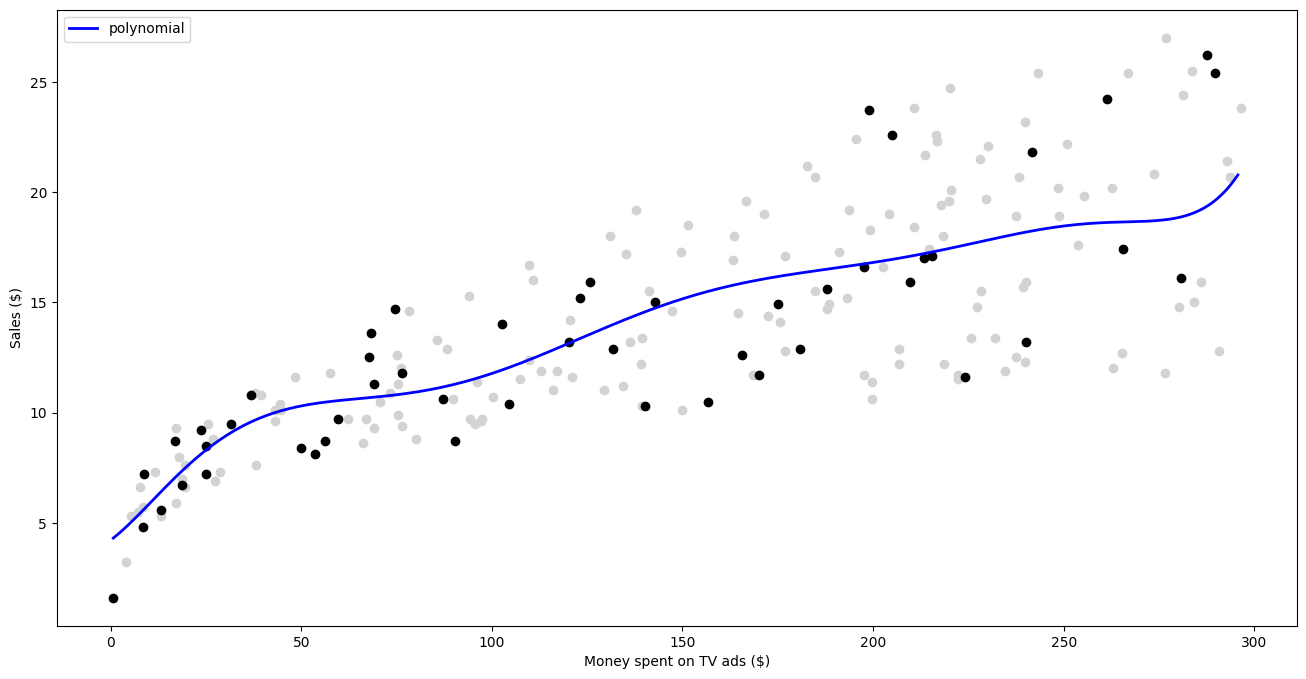

In [19]:
def visualize_polynomial(polynomial_regression_pipeline):
    X_plot = pd.DataFrame({'TV': np.arange(min(data['TV']),max(data['TV']),1)})
    y_poly_plot = polynomial_regression_pipeline.predict(X_plot)

    plt.figure(figsize=(16, 8))
    plt.scatter(X_train_poly, y_train_poly, c='lightgray')
    plt.scatter(X_val_poly, y_val_poly, c='black')
    plt.plot(X_plot, y_poly_plot, c='blue', linewidth=2, label='polynomial')

    plt.xlabel("Money spent on TV ads ($)")
    plt.ylabel("Sales ($)")
    plt.legend()
    plt.show()

visualize_polynomial(polynomial_regression_pipeline)

# Part 2: Evaluations and Comparisons
## Data Exploration

### a) I will compute a correlation matrix to know which feature correlates best

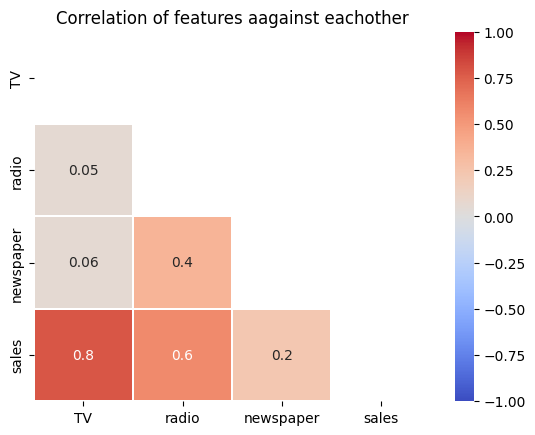

In [20]:
correlation_matrix = data.corr(numeric_only=True)
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True # Mask to keep only one half of the symetrical matrix
sns.heatmap(correlation_matrix,
              vmin = -1,
              vmax = 1,
              cmap = 'coolwarm',
              mask = mask,
              linewidths = 0.1,
              annot=True,
              fmt= '.1g',)
plt.title('Correlation of features aagainst eachother')
plt.show()

### b) To visualize the result better I will plot the sales as a function of the variable that I observed as the most correlated as well as the least correlated on a scatter plot

<Axes: xlabel='TV', ylabel='sales'>

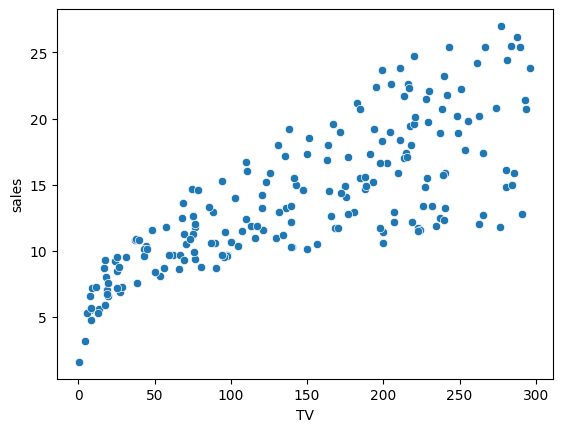

In [21]:
sns.scatterplot(data, x="TV", y="sales") # as TV is the most correlated with sales

### c) LEAST correlated

<Axes: xlabel='newspaper', ylabel='sales'>

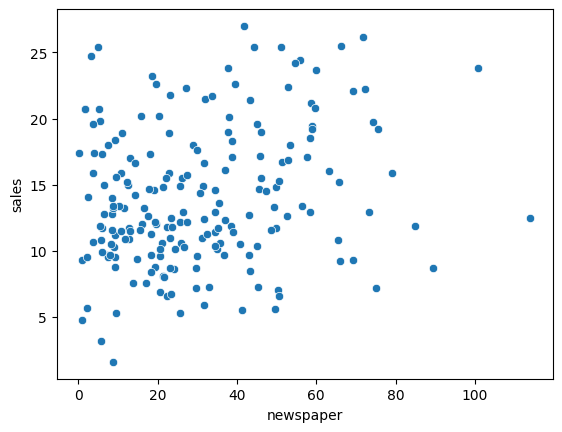

In [22]:
sns.scatterplot(data, x="newspaper", y="sales") # as newspaper is the least correlated with sales

## Evaluation
For organization, I will create a function that I will reuse over and over to evaluate the models.  

My function will:
- Generate predictions with the model on the validation datset
- Compute the following metrics: MSE, RMSE, MAE, R2 (you can use sklearn's implementation)
- Pack the results in a dataframe, with each metric on a separate row, and the name of the metric should be the index of the row.

In [23]:
def evaluate_regression(regressor, name, X_val, y_val):
    y_pred = regressor.predict(X_val)
    metrics = {
            "MSE": mean_squared_error(y_val, y_pred),
            "RMSE": mean_squared_error(y_val, y_pred, squared=False),
            "MAE": mean_absolute_error(y_val, y_pred),
            "R_squared": r2_score(y_val, y_pred),
        }
    eval_table = pd.DataFrame(metrics.values(), index=metrics.keys(), columns=[name])
    return eval_table

### Evaluating the previous polynomial regression with the function

In [24]:
evaluate_regression(polynomial_regression_pipeline, 'poly_regression', X_val_poly, y_val_poly)

,poly_regression
MSE,8.915818
RMSE,2.985937
MAE,2.303449
R_squared,0.683674


### I will re-define the features in order to use all variables.
- X_all_train
- y_train
- X_all_val
- y_val

In [25]:
X_all = data.drop(['sales'], axis=1)
y = data['sales']
X_all_train, X_all_val, y_train, y_val = train_test_split(X_all, y, test_size = 0.25, random_state = 0)

### Regularizing my model from what I have seen so far
- Since at least two of the fratures, as seen, are correlated with eachother,  instead of using LinearRegression, I will use Ridge regression
- Then I will evaluate the regularized model


In [26]:
ridge_regression_pipeline = Pipeline([
  ('poly', PolynomialFeatures(degree = 15)),
  ('scaler', StandardScaler()),
  ('regression', Ridge(alpha=1.0))
])

In [27]:
ridge_regression_pipeline.fit(X_all_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=15)),
                ('scaler', StandardScaler()), ('regression', Ridge())])

In [28]:
evaluate_regression(ridge_regression_pipeline, 'ridge_regression', X_all_val, y_val)

,ridge_regression
MSE,24.244180
RMSE,4.923838
MAE,1.479522
R_squared,0.139835


### To tune the regularizer
The Ridge regressor has an alpha hyperparameter [see documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). Already with the default setting, I was able to improve a lot on the performance. I will now itearte over the alpha hyperparameter to see better the performance even more.

In [29]:
ridgeii_regression_pipeline = Pipeline([
  ('poly', PolynomialFeatures(degree = 15)),
  ('scaler', StandardScaler()),
  ('regression', Ridge(alpha=8.0))   #Tuning alpha
])

ridgeii_regression_pipeline.fit(X_all_train, y_train)  # fitting the with new Alpha

evaluate_regression(ridgeii_regression_pipeline, 'third_poly_regression', X_all_val, y_val)  # Evaluation summary

,third_poly_regression
MSE,3.041677
RMSE,1.744040
MAE,0.914776
R_squared,0.892084


> I observed after multiple trials that the higher the model performance got better with increasing values of alpha, up until ** 8 ** which proves to be the oprimal alpha value. Beyond 8, the performance began to reduce.